# Uso das funções de determinação dos coeficientes polinomiais

Este notebook apresenta as formas de uso e teste das funções de determinação dos coeficientes polinomiais.
Testes automatizados simples são implementados para verificação das funcionalidades.

A célula de código abaixo realiza a importação das bibliotecas necessárias.

In [1]:
import marcelo_solver.coef_pol as mcp
import marcelo_solver.testes as mtt
import matplotlib.pyplot as plt # Para plotagem de gráficos
import numpy as np # Para métodos algébricos
import traceback

O módulo `coef_pol` do pacote `marcelo_solver` possui as funções para determinação dos coeficientes polinomiais, o módulo `testes` do mesmo pacote implementa testes automatizados simples para as funções de `coef_pol`.

Para a função `cfcond_termica` que determina os coeficientes de condutividade térmica, a documentação pode ser consultada da seguinte forma:

In [2]:
help(mcp.cfcond_termica)

Help on function cfcond_termica in module marcelo_solver.coef_pol:

cfcond_termica(temp, unid='C', temps_inf_interval=[20, 800], temps_sup_interval=[800, 1515])
    Determina o coeficiente de condutividade térmica para temperaturas 
    ou vetores de temperaturas.
    
    Recebe:
    · temp(float ou ndarray) - temperaturas de cálculo. 
    · [unid(str)] - caractere 'C' ou 'K' para determinar a unidade de 
    temperatura 
    · [temps_inf_interval(list)] - lista de dois elementos com as 
    temperaturas inferior e superior para os polinômios de condutividade 
    térmica.
    · [temps_sup_interval(list)] - lista de dois elementos com as 
    temperaturas inferior e superior para os polinômios de condutividade 
    térmica. 
    
    Retorna:
    · ndarray ou float  de condutividades térmicas em W/m.K



A documentação de `testes` pode ser consultada de forma semelhante. No código abaixo a função de teste da condutividade térmica é consultada.

In [3]:
help(mtt.teste_condterm)

Help on function teste_condterm in module marcelo_solver.testes:

teste_condterm(teste)
    Realiza testes de funcionamento na função de determinação do 
    coeficiente de condutividade térmica.
    
    1° - Teste de operação sobre vetor de temperaturas válidas:
    Recebe:
    teste = "VECTEMP-VAL"
        Este método cria um vetor no intervalo de temperaturas válido para
        para o modelo de coeficiente de condutividade térmica.
        Espera-se o cálculo correto dos valores de h expressos de forma gráfica.
    
    2° - Teste de operação sobre vetor de temperaturas com valores inválidos:
    teste = "VECTEMP-INVAL"
        Este método cria um vetor com valores fora do intervalo de 
        temperaturas válido para para o modelo de coeficiente de 
        condutividade térmica.
        Espera-se o levantamento de erro durante a tentativa de execuação.
    
    3° - Teste de operação sobre escalares randômicos válidos:
    teste = "RANDTEMP-VAL"
        Neste método de teste, u

O conjunto de funções disponíveis em cada módulo pode ser listado da seguinte forma:

In [4]:
print(dir(mcp))
print(dir(mtt))


['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calesp_vol', 'cfcond_termica', 'np']
['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calesp_vol', 'cfcond_termica', 'np', 'plt', 'teste_condterm', 'teste_cv']


## Uso da função `cfcond_termica`

Duas formas de uso são possíveis; na primeira delas escalares com valores de temperatura são passados para a função e um escalar com o valor do coeficiente é retornado.

In [5]:
mcp.cfcond_termica(300, 'K') # Temperatura 300K

53.105895

Opcionalmente o usuário pode optar por passar o valor de temperatura em °C.

In [6]:
mcp.cfcond_termica(26.85, 'C') # Temperatura 26,85 °C

53.105895

O intervalo de validade do modelo do coeficiente de condutividade térmica também pode ser modificado pelos parâmetros `temps_inf_interval`, e `temps_sup_interval`. Neste tipo de uso, a chamada à função fica na forma:

In [7]:
mcp.cfcond_termica(
    20, 'C', 
    temps_inf_interval = [14,30]
)

53.334

In [8]:
try:
    mcp.cfcond_termica(13,temps_inf_interval = [14,30])
except Exception as e:
    print(e)

ERRO!
A temperatura 13.0 não é definida no intervalo detemperaturas do modelo:
[14. 30.]
[ 800. 1515.]


In [9]:
mcp.cfcond_termica(
    1999, 'C', 
    temps_sup_interval = [900,2000]
)

27.3

A segunda forma de uso da função recebe como primeiro argumento um vetor de temperaturas em K ou °C, sendo a primeira unidade o parâmetro padrão. Quando um vetor é passado, a função retorna um *array* de duas linhas, na primeira delas, um vetor com as temperaturas para cálculo, e na segunda os coenficientes calculados.

Isto é necessário pois a implementação atual do método realiza a filtragem automática dos valores válidos de temperatura quando valores inválidos são passados, truncando o intervalo original de temperatura apenas para um intervalo válido.

In [10]:
matriz = mcp.cfcond_termica(np.arange(37.,500.), 'c')
print("Temperaturas (K):\n", matriz[0])

Temperaturas (K):
 [ 37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.
  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.
  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.
  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.
  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106.
 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120.
 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134.
 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148.
 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162.
 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176.
 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189. 190.
 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203. 204.
 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 218.
 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 23

In [11]:
print("Coeficientes:\n", matriz[1])

Coeficientes:
 [52.7679 52.7346 52.7013 52.668  52.6347 52.6014 52.5681 52.5348 52.5015
 52.4682 52.4349 52.4016 52.3683 52.335  52.3017 52.2684 52.2351 52.2018
 52.1685 52.1352 52.1019 52.0686 52.0353 52.002  51.9687 51.9354 51.9021
 51.8688 51.8355 51.8022 51.7689 51.7356 51.7023 51.669  51.6357 51.6024
 51.5691 51.5358 51.5025 51.4692 51.4359 51.4026 51.3693 51.336  51.3027
 51.2694 51.2361 51.2028 51.1695 51.1362 51.1029 51.0696 51.0363 51.003
 50.9697 50.9364 50.9031 50.8698 50.8365 50.8032 50.7699 50.7366 50.7033
 50.67   50.6367 50.6034 50.5701 50.5368 50.5035 50.4702 50.4369 50.4036
 50.3703 50.337  50.3037 50.2704 50.2371 50.2038 50.1705 50.1372 50.1039
 50.0706 50.0373 50.004  49.9707 49.9374 49.9041 49.8708 49.8375 49.8042
 49.7709 49.7376 49.7043 49.671  49.6377 49.6044 49.5711 49.5378 49.5045
 49.4712 49.4379 49.4046 49.3713 49.338  49.3047 49.2714 49.2381 49.2048
 49.1715 49.1382 49.1049 49.0716 49.0383 49.005  48.9717 48.9384 48.9051
 48.8718 48.8385 48.8052 48.7719 48.7

Note que por padrão, apenas temperaturas acima de 20°C são válidas. Note como a função realiza a truncagem de forma automatizada.

In [12]:
matriz = mcp.cfcond_termica(np.linspace(0.,21., 40), 'c') # Vetor de temperaturas entre 0 e 21°C com 40 elementos

print("Temperaturas (K):\n", matriz[0])
print("Coeficientes:\n", matriz[1])

Temperaturas (K):
 [20.46153846 21.        ]
Coeficientes:
 [53.31863077 53.3007    ]


## Teste da função `cfcond_termica`

### Teste de operação sobre um vetor de temperaturas válido

Note que nenhuma personalização é aplicada ao gráfico, ficando ao critério do usuário fazê-lo. 
Os objetos retornados `fig` e `ax` são nativos do [Maplotlib](https://matplotlib.org/), onde a documentação para os métodos de [Axis](https://matplotlib.org/stable/api/axis_api.html) e [Figure](https://matplotlib.org/stable/api/figure_api.html#module-matplotlib.figure) podem ser consultadas.

Testes na função cfcond_termica().


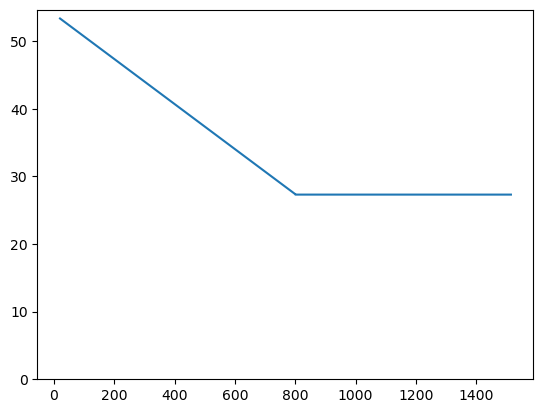

In [13]:
fig, ax = mtt.teste_condterm("VECTEMP-VAL")
ax.set_ylim(bottom=0)
plt.show()

### Teste de operação sobre um vetor de temperaturas parcialmente válido

Testes na função cfcond_termica().
Testando um vetor de temperaturas entre 0.0 e 1999.9


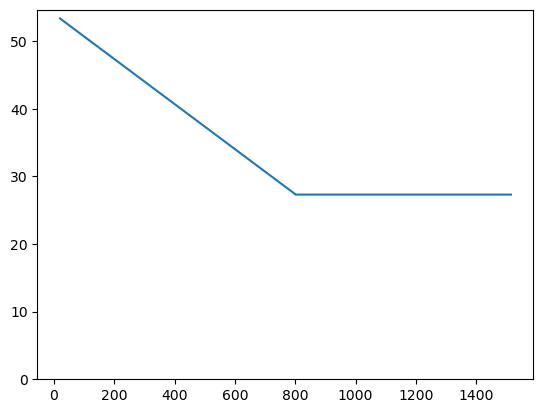

In [14]:
fig, ax = mtt.teste_condterm("VECTEMP-PARC-INVAL")
ax.set_ylim(bottom=0)
plt.show()

### Teste de operação randômica

Testes na função cfcond_termica().


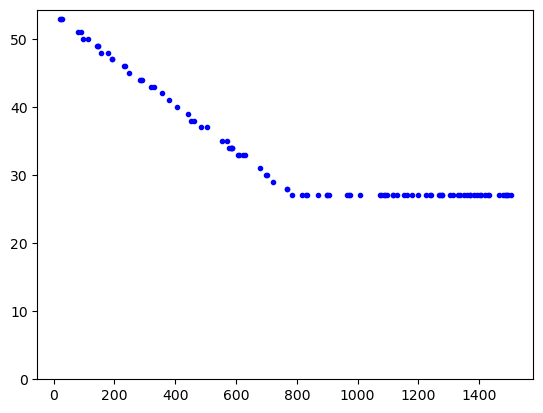

In [15]:
fig, ax = mtt.teste_condterm("RANDTEMP-VAL")
ax.set_ylim(bottom=0)
plt.show()

## Uso da função `calesp_vol`

A interface de uso da função de determinação dos calores específicos volumares `calesp_vol` segue o padrão da anterior, conforme pode ser visto na documentação.

In [16]:
help(mcp.calesp_vol)

Help on function calesp_vol in module marcelo_solver.coef_pol:

calesp_vol(temp, unid='C', temps_itv_1=[20.0, 600.0], temps_itv_2=[600.0, 735.0], temps_itv_3=[735.0, 900.0], temps_itv_4=[900.0, 1515.0])
    Determina o calor específico volumar para temperaturas (escalar)
    ou vetores de temperaturas.
    
    Recebe:
    · temp(float ou ndarray) - temperaturas de cálculo. 
    · [unid(str)] - caractere 'C' ou 'K' para determinar a unidade de 
    temperatura 
    · [temps_itv_1(list)] - lista de dois elementos com as 
    temperaturas inferior e superior para o primeiro polinômio de cv.
    · [temps_itv_2(list)] - lista de dois elementos com as 
    temperaturas inferior e superior para o segundo polinômio de cv.
    · [temps_itv_3(list)] - lista de dois elementos com as 
    temperaturas inferior e superior para o terceiro polinômio de cv.
    · [temps_itv_4(list)] - lista de dois elementos com as 
    temperaturas inferior e superior para o quarto polinômio de cv.
    
    Retorna:

Nas células abaixo a função é utilizada com os mesmos parâmetros empregados nos exemplos anteriores.

In [17]:
mcp.calesp_vol(26.85) # Temperatura 26,85 °C

444.4937189475425

In [18]:
mcp.calesp_vol(300, 'K') # Temperatura 300K

444.49371894754256

In [19]:
mcp.calesp_vol(20, temps_itv_1 = [14,30])

439.76624

In [20]:
try:
    mcp.calesp_vol(13,temps_itv_1 = [14,30])
except Exception as e:
    print(e)

ERRO!
A temperatura 13.0 não é definida no intervalo detemperaturas do modelo.


In [21]:
mcp.calesp_vol(1999, temps_itv_1 = [900,2000])

-22516.38800778

In [22]:
matriz = mcp.calesp_vol(np.arange(37.,500.))
print("Temperaturas (K):\n", matriz[0])

Temperaturas (K):
 [ 37.  38.  39.  40.  41.  42.  43.  44.  45.  46.  47.  48.  49.  50.
  51.  52.  53.  54.  55.  56.  57.  58.  59.  60.  61.  62.  63.  64.
  65.  66.  67.  68.  69.  70.  71.  72.  73.  74.  75.  76.  77.  78.
  79.  80.  81.  82.  83.  84.  85.  86.  87.  88.  89.  90.  91.  92.
  93.  94.  95.  96.  97.  98.  99. 100. 101. 102. 103. 104. 105. 106.
 107. 108. 109. 110. 111. 112. 113. 114. 115. 116. 117. 118. 119. 120.
 121. 122. 123. 124. 125. 126. 127. 128. 129. 130. 131. 132. 133. 134.
 135. 136. 137. 138. 139. 140. 141. 142. 143. 144. 145. 146. 147. 148.
 149. 150. 151. 152. 153. 154. 155. 156. 157. 158. 159. 160. 161. 162.
 163. 164. 165. 166. 167. 168. 169. 170. 171. 172. 173. 174. 175. 176.
 177. 178. 179. 180. 181. 182. 183. 184. 185. 186. 187. 188. 189. 190.
 191. 192. 193. 194. 195. 196. 197. 198. 199. 200. 201. 202. 203. 204.
 205. 206. 207. 208. 209. 210. 211. 212. 213. 214. 215. 216. 217. 218.
 219. 220. 221. 222. 223. 224. 225. 226. 227. 228. 229. 23

In [23]:
print("Coeficientes:\n", matriz[1])

Coeficientes:
 [451.17494034 451.81182416 452.44482182 453.07392    453.69910538
 454.32036464 454.93768446 455.55105152 456.1604525  456.76587408
 457.36730294 457.96472576 458.55812922 459.1475     459.73282478
 460.31409024 460.89128306 461.46438992 462.0333975  462.59829248
 463.15906154 463.71569136 464.26816862 464.81648    465.36061218
 465.90055184 466.43628566 466.96780032 467.4950825  468.01811888
 468.53689614 469.05140096 469.56162002 470.06754    470.56914758
 471.06642944 471.55937226 472.04796272 472.5321875  473.01203328
 473.48748674 473.95853456 474.42516342 474.88736    475.34511098
 475.79840304 476.24722286 476.69155712 477.1313925  477.56671568
 477.99751334 478.42377216 478.84547882 479.26262    479.67518238
 480.08315264 480.48651746 480.88526352 481.2793775  481.66884608
 482.05365594 482.43379376 482.80924622 483.18       483.54604178
 483.90735824 484.26393606 484.61576192 484.9628225  485.30510448
 485.64259454 485.97527936 486.30314562 486.62618    486.9443

In [24]:
matriz = mcp.calesp_vol(np.linspace(0.,21., 40)) # Vetor de temperaturas entre 0 e 21°C com 40 elementos

print("Temperaturas (K):\n", matriz[0])
print("Coeficientes:\n", matriz[1])

Temperaturas (K):
 [20.46153846 21.        ]
Coeficientes:
 [440.0901911  440.46715058]


## Teste da função `calesp_vol`

### Teste de operação sobre um vetor de temperaturas válido

Testes na função teste_cv().


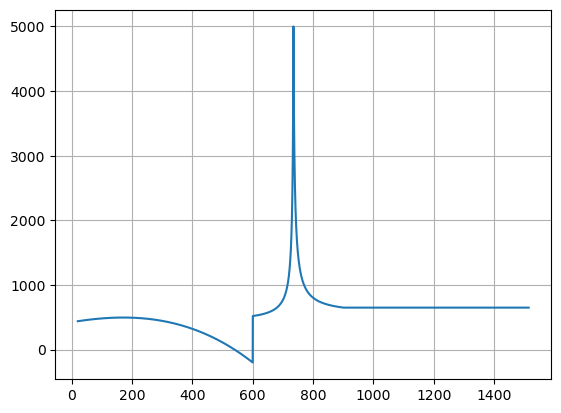

In [30]:
fig, ax = mtt.teste_cv("VECTEMP-VAL")
ax.grid()

### Teste de operação sobre um vetor de temperaturas parcialmente válido
Note a truncagem do eixo horizontal.

Testes na função teste_cv().
Testando um vetor de temperaturas entre 0.0 e 1999.9


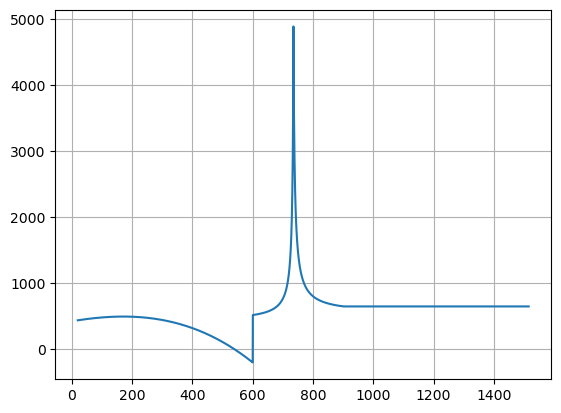

In [31]:
fig, ax = mtt.teste_cv("VECTEMP-PARC-INVAL")
ax.grid()

### Teste de operação randômica 

Testes na função teste_cv().


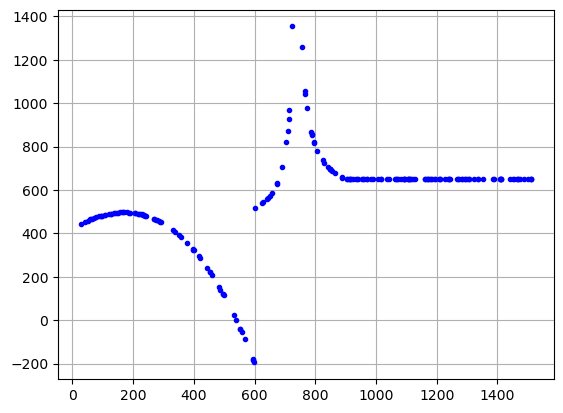

In [34]:
fig, ax = mtt.teste_cv("RANDTEMP-VAL")
ax.grid()